In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(train_image,train_label),(test_image,test_label)=\
    tf.keras.datasets.fashion_mnist.load_data()
print("train_image : ",train_image.shape)
print("train_label : ",train_label.shape)
print("test_image : ",test_image.shape)
print("test_label : ",test_label.shape)

train_image :  (60000, 28, 28)
train_label :  (60000,)
test_image :  (10000, 28, 28)
test_label :  (10000,)


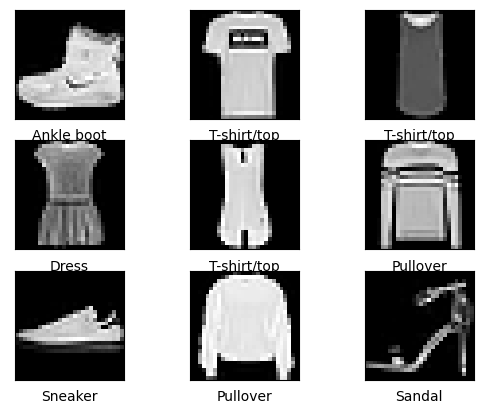

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
# 顯示指定的影像 (這裡顯示九張)
def ShowImage(x,y):
    for i in range(9):
        plt.subplot(330 + 1 + i)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(class_names[y[i]])
    plt.show()

ShowImage(train_image,train_label)

In [3]:
# 對資料集做一個前置處理, 將資料正規到 0~1 之間
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)
    return x,y

# 建立模型
def build_model():
    # 線性疊加
    model = tf.keras.models.Sequential()
    # 改變平坦輸入
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    # 第一層隱藏層, 包含256個神經元
    model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
    # 第二層隱藏層, 包含128個神經元
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    # 第三層隱藏層, 包含256個神經元
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    # 第四層為輸出層分 10 個類別
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    return model

model = build_model()
print(model.summary())

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


2022-10-21 15:44:57.517593: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 15:44:57.517729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# 編譯模型
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images, train_labels = preprocess(train_image, train_label)
batchsz = 128  # 設定批次大小
# 訓練模型
history = model.fit(train_images, train_labels,epochs=100,
                    batch_size = batchsz,   # 設定批次訓練大小
                    validation_split = 0.2,    # 劃分資料集的 20% 作為驗證集用
                    verbose = 2)  # 印出為精簡模式

Epoch 1/100


2022-10-21 15:48:24.175990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-10-21 15:48:26.451983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 - 3s - loss: 0.0508 - accuracy: 0.9806 - val_loss: 0.7001 - val_accuracy: 0.8907 - 3s/epoch - 8ms/step
Epoch 2/100
375/375 - 2s - loss: 0.0399 - accuracy: 0.9851 - val_loss: 0.7307 - val_accuracy: 0.8895 - 2s/epoch - 6ms/step
Epoch 3/100
375/375 - 2s - loss: 0.0416 - accuracy: 0.9843 - val_loss: 0.7413 - val_accuracy: 0.8898 - 2s/epoch - 6ms/step
Epoch 4/100
375/375 - 2s - loss: 0.0476 - accuracy: 0.9826 - val_loss: 0.6816 - val_accuracy: 0.8918 - 2s/epoch - 6ms/step
Epoch 5/100
375/375 - 2s - loss: 0.0372 - accuracy: 0.9862 - val_loss: 0.6814 - val_accuracy: 0.8950 - 2s/epoch - 6ms/step
Epoch 6/100
375/375 - 2s - loss: 0.0391 - accuracy: 0.9853 - val_loss: 0.7386 - val_accuracy: 0.8985 - 2s/epoch - 6ms/step
Epoch 7/100
375/375 - 2s - loss: 0.0441 - accuracy: 0.9844 - val_loss: 0.6549 - val_accuracy: 0.8942 - 2s/epoch - 6ms/step
Epoch 8/100
375/375 - 2s - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.7161 - val_accuracy: 0.8974 - 2s/epoch - 6ms/step
Epoch 9/100
375/375 - 2s - l

In [ ]:
import numpy as np
# 測試資料的預處理
test_image, test_labels = preprocess(test_image, test_label)
predicted_image15 = model.predict(test_image[:15])
predicted_ids15 = np.argmax(predicted_image15, axis=-1)  # 取出機率最大的 index
print("Predicted labels: ", predicted_ids15[:15])
print("test labels: ", test_label[:15])

In [ ]:
# 儲存網路
model.save('./Fashion_model.h5')
print('Save Model')
del model

In [ ]:
# 載入模型
print('loaded model from Fashion_model.h5')
Model2 = tf.keras.models.load_model('Fashion_model.h5',compile=False)
# 拿前十五筆資料來預測並印出標籤
prediction = Model2.predict(test_image[:15])
print(tf.argmax(prediction,1))
# 印出前十五筆資料的正確標籤
print(test_labels[:15])

In [ ]:
"""
predicted_image = model.predict(test_image)  # 進行預測
print(predicted_image.shape)
predicted_ids = np.argmax(predicted_image, axis=-1)  # 取出機率最大的 index
print("Predicted labels: ", predicted_ids)
print("test labels: ", test_label)
# 比較兩個 predicted_ids 與 test_label 是否相同
correct_prediction = tf.equal(predicted_ids,test_label)  
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
print(accuracy*100)

"""